In [1]:
import glob

In [2]:
filelist = glob.glob('/output/*_20.txt')
histfile = glob.glob('/output/transacHistory.txt')

In [3]:
transacHistory = {} #key:transac ID , value: timestamp of sending
transacCount = {} #count number of node each transaction has arrived
transacTotCount= {} #number of node each transaction should arrive
timeToAll = {}    #timestamps of transcation received at each node
tA = {} #timestamps of transcation received by all nodes
tH = {} #timestamps of transcation received by half nodes
with open(histfile[0]) as open_f:
        for item in open_f:
            trInfo = item.split()
            transacHistory[trInfo[0]] = float(trInfo[1])
            transacCount[trInfo[0]] = 0
            transacTotCount[trInfo[0]] = 0
            timeToAll[trInfo[0]] = []
            tA[trInfo[0]] = 0
            tH[trInfo[0]] = 0
#print(transacHistory)
#num of nodes all each transact is sent
start_times = []
end_times = []

for f in filelist:
    start_time = 0
    end_time = 0
    append_end = False
    with open(f) as open_f:
        for item in open_f:
            trInfo = item.split()
            #print(trInfo)
            if(trInf0[0]=="START"):
                start_time = float(trInfo[1])
                start_times.append(start_time)
            else if(trInf0[0]=="END"):
                end_time = float(trInfo[1])
                end_times.append(end_time)
                append_end = True
        if(not append_end):
                end_times.append(999999999.999999)
                

for k in transacHistory:
    for (start,end) in zip(start_times,end_times):
        if(transacHistory[k]>start and transacHistory[k]<end):
           transacTotCount[k]+=1

In [5]:
for k in transacHistory:
    for f in filelist:
        with open(f) as open_f:
            for item in open_f:
                 trInfo = item.split()
                 start_time = float(trInfo[0])
                 break
                
for f in filelist:
    start_time = 0
    end_time = 0
    with open(f) as open_f:
        for item in open_f:
            trInfo = item.split()
            #print(trInfo)
            if(trInf0[0]=="START"):
                start_time = float(trInfo[1])
            else if(trInf0[0]=="END"):
                end_time = float(trInfo[1])
            else:
                transacCount[trInfo[0]] += 1
                timeToAll[trInfo[0]].append(float(trInfo[1]))
                
timeToAll['bbbbe9d06cc4753b27297440399c5e4a'].sort()
#print(len(timeToAll['bbbbe9d06cc4753b27297440399c5e4a']))
print(timeToAll['bbbbe9d06cc4753b27297440399c5e4a'])

[1553659351.959645, 1553659351.96092, 1553659351.961179, 1553659351.961492, 1553659351.963102, 1553659351.963277, 1553659351.964268, 1553659351.964815, 1553659351.965614, 1553659351.966622]


In [6]:
#verify reach all nodes
reachAll = True
for k in transacCount:
    if(transacCount[k]<transacTotCount[k]):
        reachAll = False
if(reachAll):
    print("Reach All")
else:
    print("Not Reach All")

Reach All


In [10]:
#time to reach all and half the nodes:
for k in timeToAll:
   timeToAll[k].sort()
   tA[k] =  timeToAll[k][len(timeToAll[k])-2] - transacHistory[k]
   tH[k] =  timeToAll[k][int(len(timeToAll[k])/2)] - transacHistory[k]

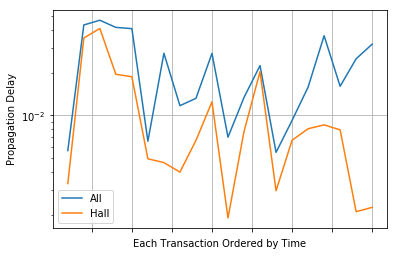

In [17]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
plt.figure(0)
plt.semilogy(np.arange(1,len(tA)+1),tA.values(),label='All')
plt.semilogy(np.arange(1,len(tH)+1),tH.values(),label='Hall')
plt.xlabel('Each Transaction Ordered by Time')
plt.ylabel('Propagation Delay')
plt.grid(True)
plt.legend(loc=0)
ax = plt.axes()
#ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())